In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeRegressor
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)


In [17]:
df = pd.read_csv('data/pipe_pricing_dataset.csv')
df


,pipe_id,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room
0,1,4.37,5.54,S1,False,6.17,4.73,0.81
1,2,9.56,12.16,S4,False,11.75,10.35,1.81
2,3,7.59,10.05,S2,False,9.63,8.22,1.83
3,4,6.39,7.44,S1,False,8.34,6.92,0.52
4,5,2.40,5.19,S2,False,4.05,2.60,2.59
...,...,...,...,...,...,...,...,...
195,196,4.14,4.67,S4,False,5.92,4.48,0.19
196,197,7.53,8.54,S3,False,9.57,8.15,0.39
197,198,9.07,10.87,S1,False,11.22,9.82,1.05
198,199,8.98,11.65,S2,False,11.13,9.73,1.92


In [25]:
df['new_target_price'] = pd.qcut(df['target_price_market'], q=4)
df

,pipe_id,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room,new_target_price
0,-2.079376,-0.285650,-0.480058,S1,False,-0.297189,-0.285681,-0.633784,"(-0.839, 0.113]"
1,-2.032923,1.472637,1.372067,S4,False,1.485879,1.470559,0.231870,"(0.933, 1.585]"
2,-1.990711,0.859317,0.877842,S2,False,0.859199,0.859238,0.248406,"(0.113, 0.933]"
3,-1.951397,0.457340,0.157619,S1,False,0.450743,0.457671,-0.903036,"(0.113, 0.933]"
4,-1.914247,-1.131902,-0.612232,S2,False,-1.132123,-1.131489,0.859581,"(-1.8019999999999998, -0.839]"
...,...,...,...,...,...,...,...,...,...
195,1.505250,-0.376986,-0.819297,S4,False,-0.389395,-0.377372,-1.223694,"(-0.839, 0.113]"
196,1.518824,0.839785,0.478967,S3,False,0.840701,0.838226,-1.027326,"(0.113, 0.933]"
197,1.532379,1.324783,1.077637,S1,False,1.333791,1.323140,-0.418094,"(0.933, 1.585]"
198,1.545914,1.297310,1.258353,S2,False,1.307679,1.297819,0.322508,"(0.933, 1.585]"


In [22]:

phik_corr = df.phik_matrix()

interval columns not set, guessing: ['pipe_id', 'pipe_length_m', 'price_eur', 'target_price_market', 'target_price_benchmark', 'negotiation_room']


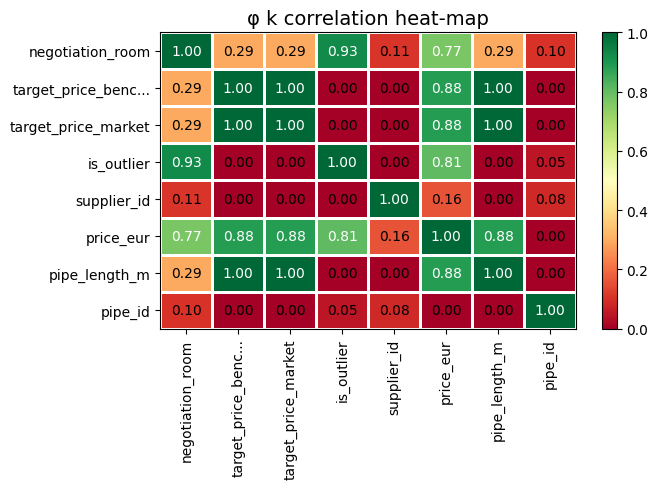

In [ ]:
from phik.report import plot_correlation_matrix
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    vmin=0, vmax=1,  # optional; defaults are (-1, +1)
    title="φ k correlation heat-map"
)
plt.show()

In [ ]:
df.drop(columns=['pipe_id'])

,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room
0,4.37,5.54,S1,False,6.17,4.73,0.81
1,9.56,12.16,S4,False,11.75,10.35,1.81
2,7.59,10.05,S2,False,9.63,8.22,1.83
3,6.39,7.44,S1,False,8.34,6.92,0.52
4,2.40,5.19,S2,False,4.05,2.60,2.59
...,...,...,...,...,...,...,...
195,4.14,4.67,S4,False,5.92,4.48,0.19
196,7.53,8.54,S3,False,9.57,8.15,0.39
197,9.07,10.87,S1,False,11.22,9.82,1.05
198,8.98,11.65,S2,False,11.13,9.73,1.92


<Axes: xlabel='target_price_market', ylabel='Count'>

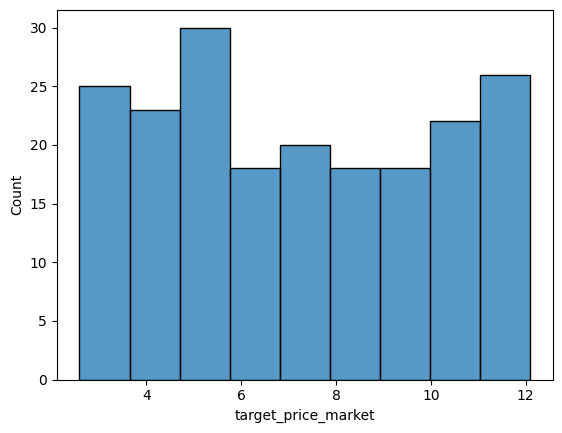

In [ ]:
sns.histplot(df['target_price_market'])


In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['pipe_id', 'pipe_length_m', 'price_eur', 'target_price_market',
       'target_price_benchmark', 'negotiation_room'],
      dtype='object')

In [10]:
df['target_price_market'].unique()


array([ 6.17, 11.75,  9.63,  8.34,  4.05,  3.1 , 10.93,  8.36,  9.4 ,
        2.75, 11.93, 10.6 ,  4.6 ,  4.31,  4.32,  5.49,  7.62,  6.73,
        5.36,  8.47,  3.9 ,  5.37,  6.09,  6.95, 10.15,  4.48,  7.52,
        8.28,  2.99,  8.43,  4.19,  3.18, 11.73, 11.89, 10.37,  3.49,
        9.17,  6.8 ,  3.72,  7.34,  2.87, 11.34,  5.05,  8.95,  5.56,
        7.58,  7.83,  4.33, 10.05, 11.64, 11.2 ,  8.33, 11.47,  3.4 ,
        4.43,  2.98,  5.69,  6.31,  5.17, 10.57,  5.99,  5.26,  7.79,
        3.91, 10.31,  3.26, 12.1 , 10.02,  4.47,  2.59, 10.44,  9.38,
        9.6 , 10.01,  6.02,  3.66, 10.9 ,  8.58,  5.75,  3.15,  5.55,
        9.61,  8.72, 11.13,  7.11,  3.7 ,  9.45,  9.91,  7.97,  7.32,
        7.6 ,  6.68,  2.79,  3.58,  2.84,  8.71,  5.59,  7.47, 11.33,
        4.95,  6.51,  9.86,  4.76,  3.28,  5.35,  4.1 , 11.55, 10.36,
        8.67, 10.98, 10.32,  4.35, 11.18,  7.76, 11.21,  5.62,  3.61,
        4.75,  6.67, 10.46, 10.88,  2.61,  7.49,  6.59,  4.69,  5.81,
       11.68,  5.67,

In [11]:
df['target_price_market'] = df['target_price_market'].apply(lambda x: x.strip())

AttributeError: 'float' object has no attribute 'strip'

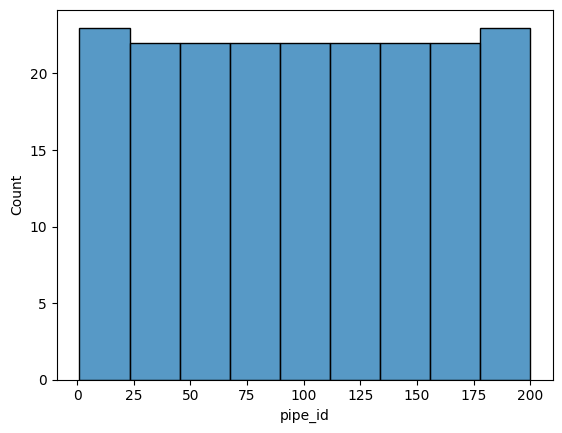

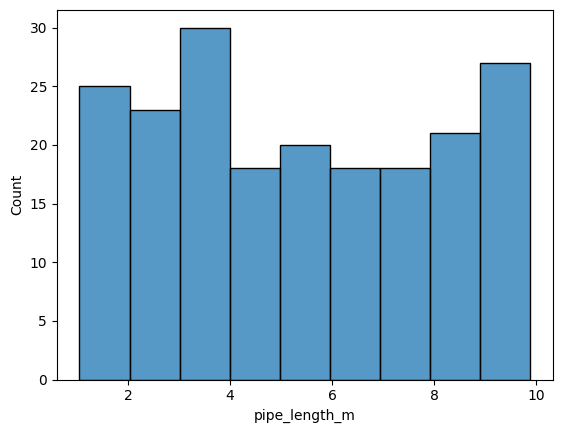

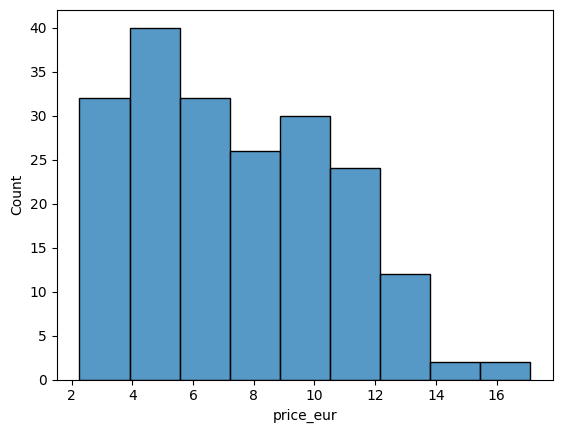

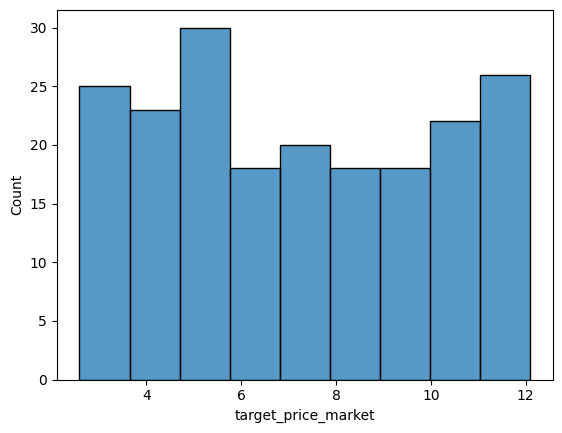

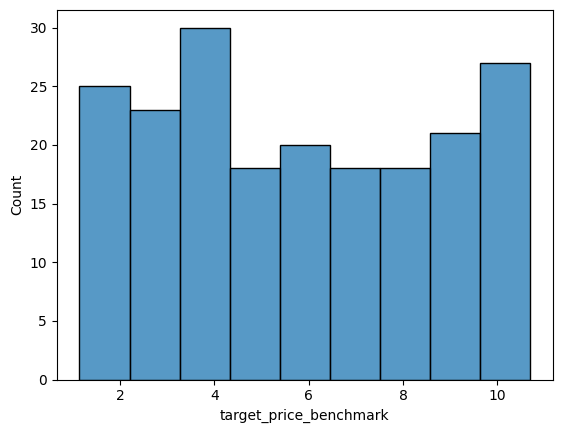

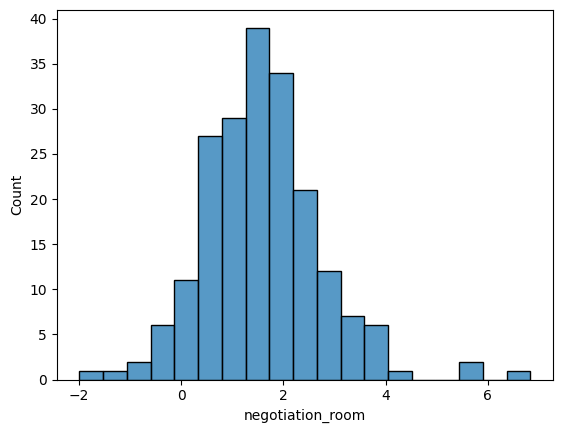

In [ ]:
for col in num_cols:
    sns.histplot(df[col])
    plt.show()


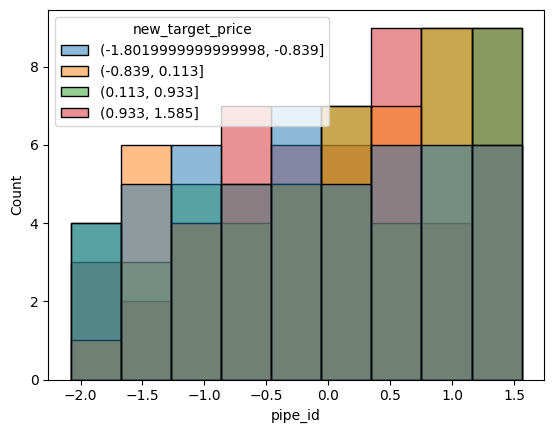

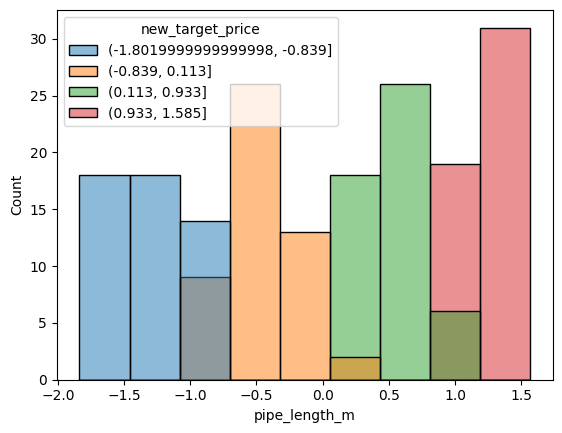

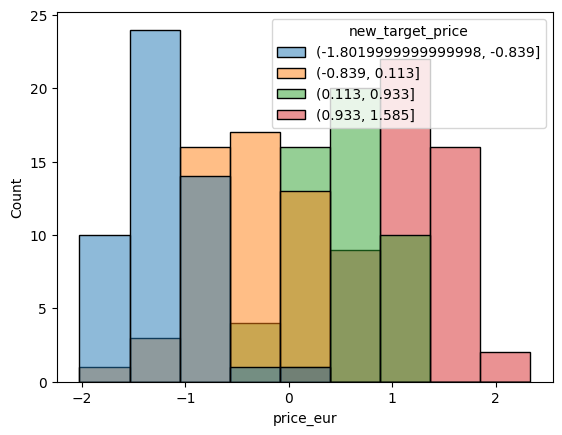

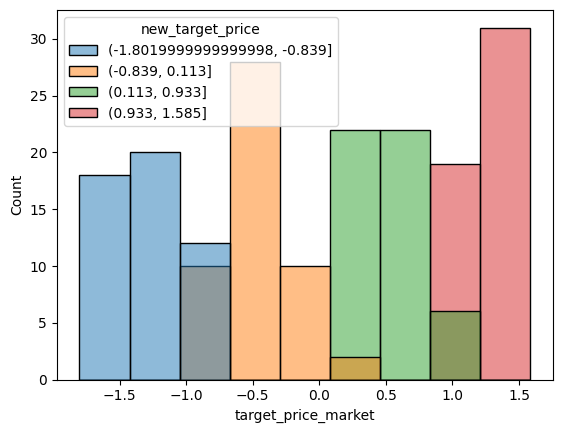

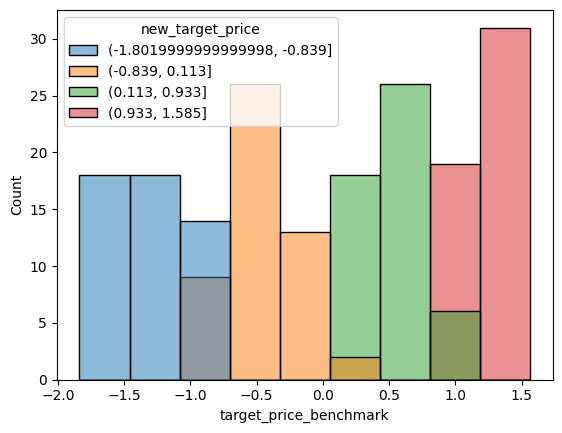

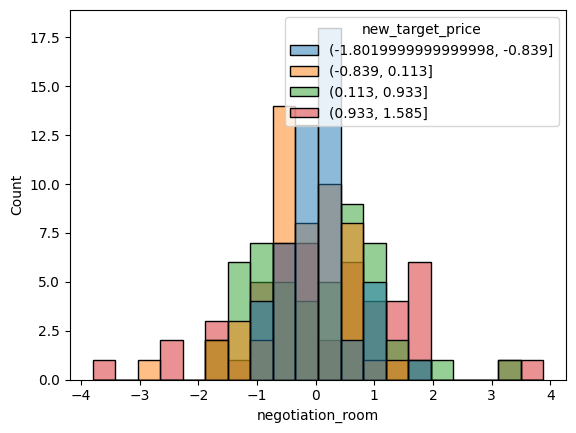

In [26]:
for col in num_cols:
    sns.histplot(x=df[col],hue=df['new_target_price'])
    plt.show()

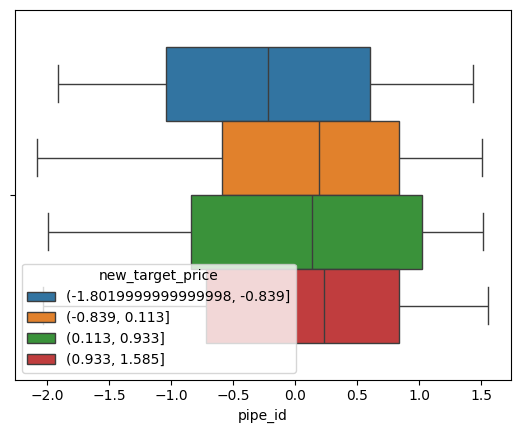

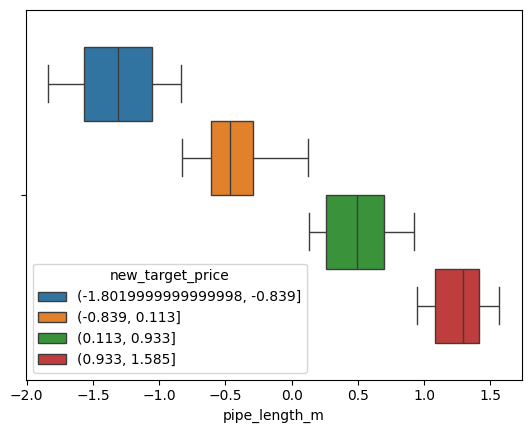

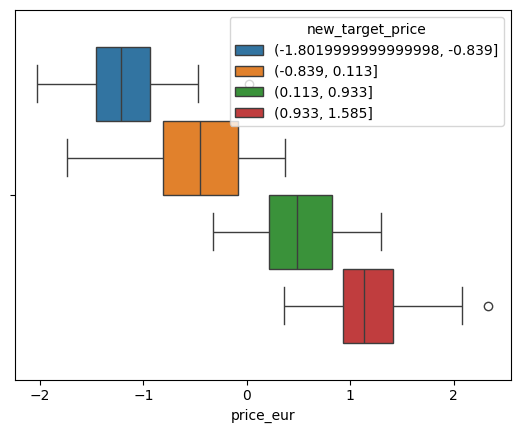

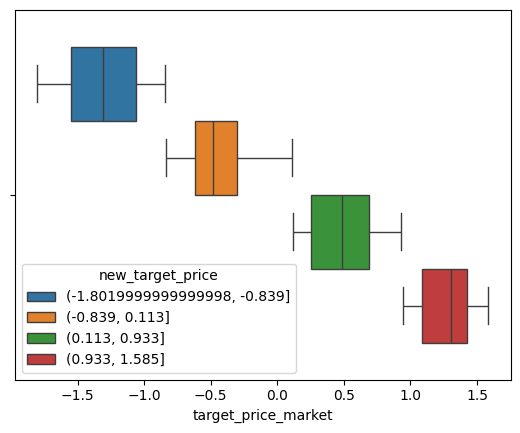

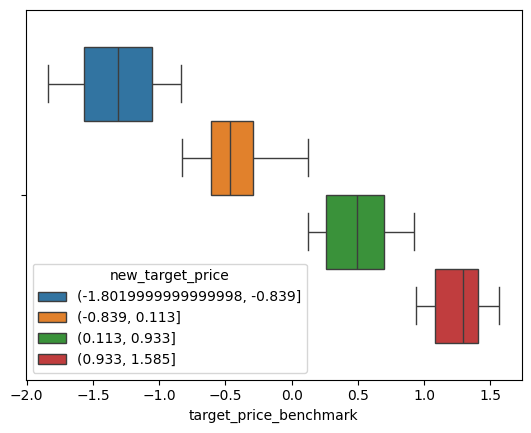

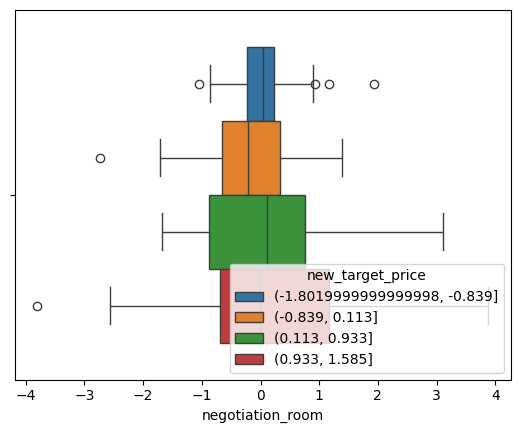

In [27]:
df.columns
for col in num_cols:
    sns.boxplot(x=df[col],hue=df['new_target_price'])
    plt.show()


In [13]:
df[df['Cr'] > 500]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [19]:
pt = PowerTransformer()
pt.fit(df[num_cols])
df[num_cols] = pt.transform(df[num_cols])
df

,pipe_id,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room
0,-2.079376,-0.285650,-0.480058,S1,False,-0.297189,-0.285681,-0.633784
1,-2.032923,1.472637,1.372067,S4,False,1.485879,1.470559,0.231870
2,-1.990711,0.859317,0.877842,S2,False,0.859199,0.859238,0.248406
3,-1.951397,0.457340,0.157619,S1,False,0.450743,0.457671,-0.903036
4,-1.914247,-1.131902,-0.612232,S2,False,-1.132123,-1.131489,0.859581
...,...,...,...,...,...,...,...,...
195,1.505250,-0.376986,-0.819297,S4,False,-0.389395,-0.377372,-1.223694
196,1.518824,0.839785,0.478967,S3,False,0.840701,0.838226,-1.027326
197,1.532379,1.324783,1.077637,S1,False,1.333791,1.323140,-0.418094
198,1.545914,1.297310,1.258353,S2,False,1.307679,1.297819,0.322508


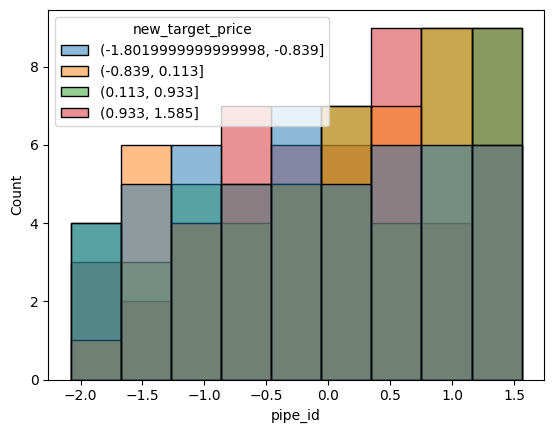

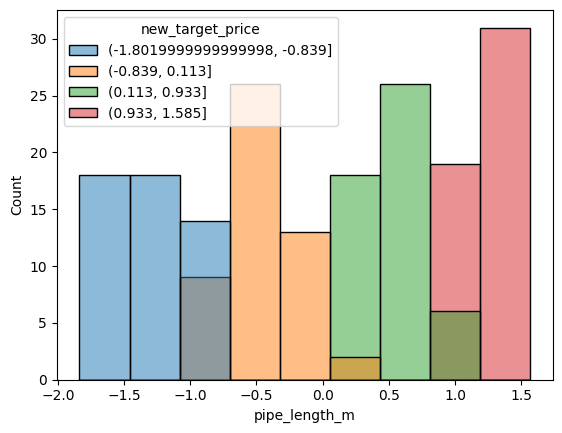

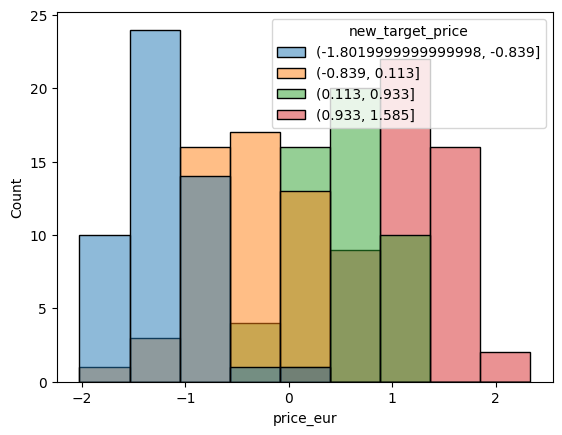

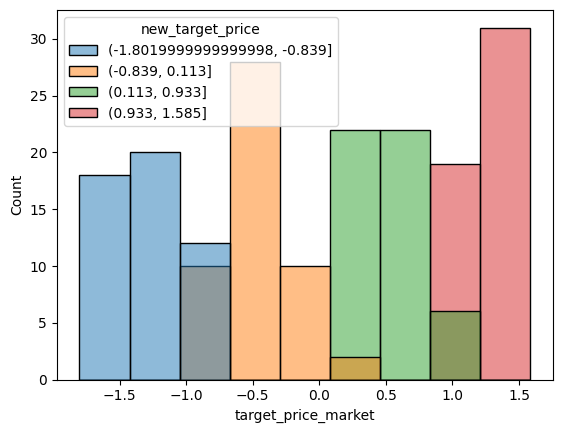

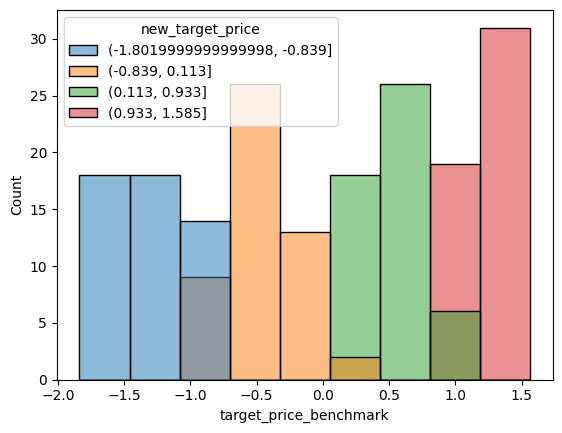

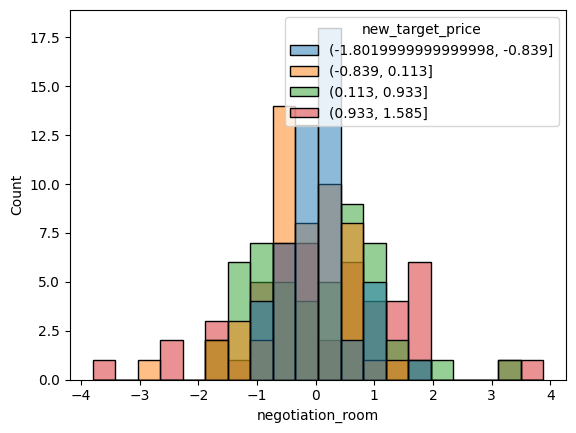

In [28]:
for col in num_cols:
    sns.histplot(x=df[col],hue=df['new_target_price'])
    plt.show()

In [37]:
df.drop(columns=['new_target_price'])

,pipe_id,pipe_length_m,price_eur,supplier_id,is_outlier,target_price_market,target_price_benchmark,negotiation_room
0,-2.079376,-0.285650,-0.480058,S1,False,-0.297189,-0.285681,-0.633784
1,-2.032923,1.472637,1.372067,S4,False,1.485879,1.470559,0.231870
2,-1.990711,0.859317,0.877842,S2,False,0.859199,0.859238,0.248406
3,-1.951397,0.457340,0.157619,S1,False,0.450743,0.457671,-0.903036
4,-1.914247,-1.131902,-0.612232,S2,False,-1.132123,-1.131489,0.859581
...,...,...,...,...,...,...,...,...
195,1.505250,-0.376986,-0.819297,S4,False,-0.389395,-0.377372,-1.223694
196,1.518824,0.839785,0.478967,S3,False,0.840701,0.838226,-1.027326
197,1.532379,1.324783,1.077637,S1,False,1.333791,1.323140,-0.418094
198,1.545914,1.297310,1.258353,S2,False,1.307679,1.297819,0.322508


In [29]:
sign = np.sign(df[num_cols].corr(method='spearman'))
sign

,pipe_id,pipe_length_m,price_eur,target_price_market,target_price_benchmark,negotiation_room
pipe_id,1.0,1.0,1.0,1.0,1.0,1.0
pipe_length_m,1.0,1.0,1.0,1.0,1.0,1.0
price_eur,1.0,1.0,1.0,1.0,1.0,1.0
target_price_market,1.0,1.0,1.0,1.0,1.0,1.0
target_price_benchmark,1.0,1.0,1.0,1.0,1.0,1.0
negotiation_room,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
phik_corr.loc[num_cols,num_cols]=phik_corr.loc[num_cols,num_cols]*sign

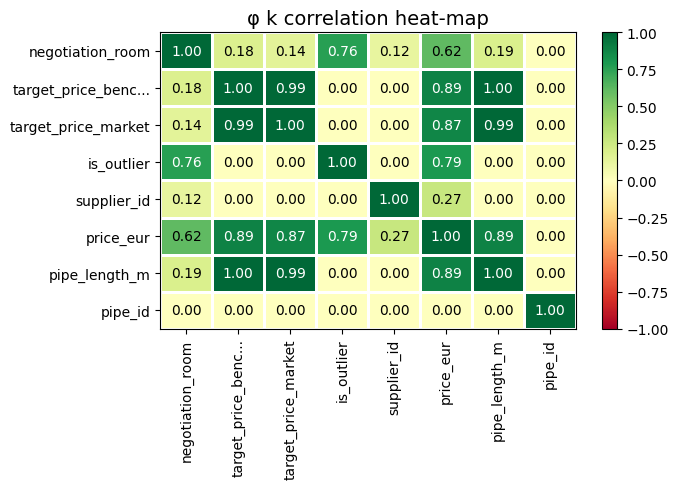

In [31]:
from phik.report import plot_correlation_matrix
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    vmin=-1, vmax=1,  # optional; defaults are (-1, +1)
    title="φ k correlation heat-map"
)
plt.show()

In [38]:
X = df[num_cols]
y = df['target_price_market']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [39]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

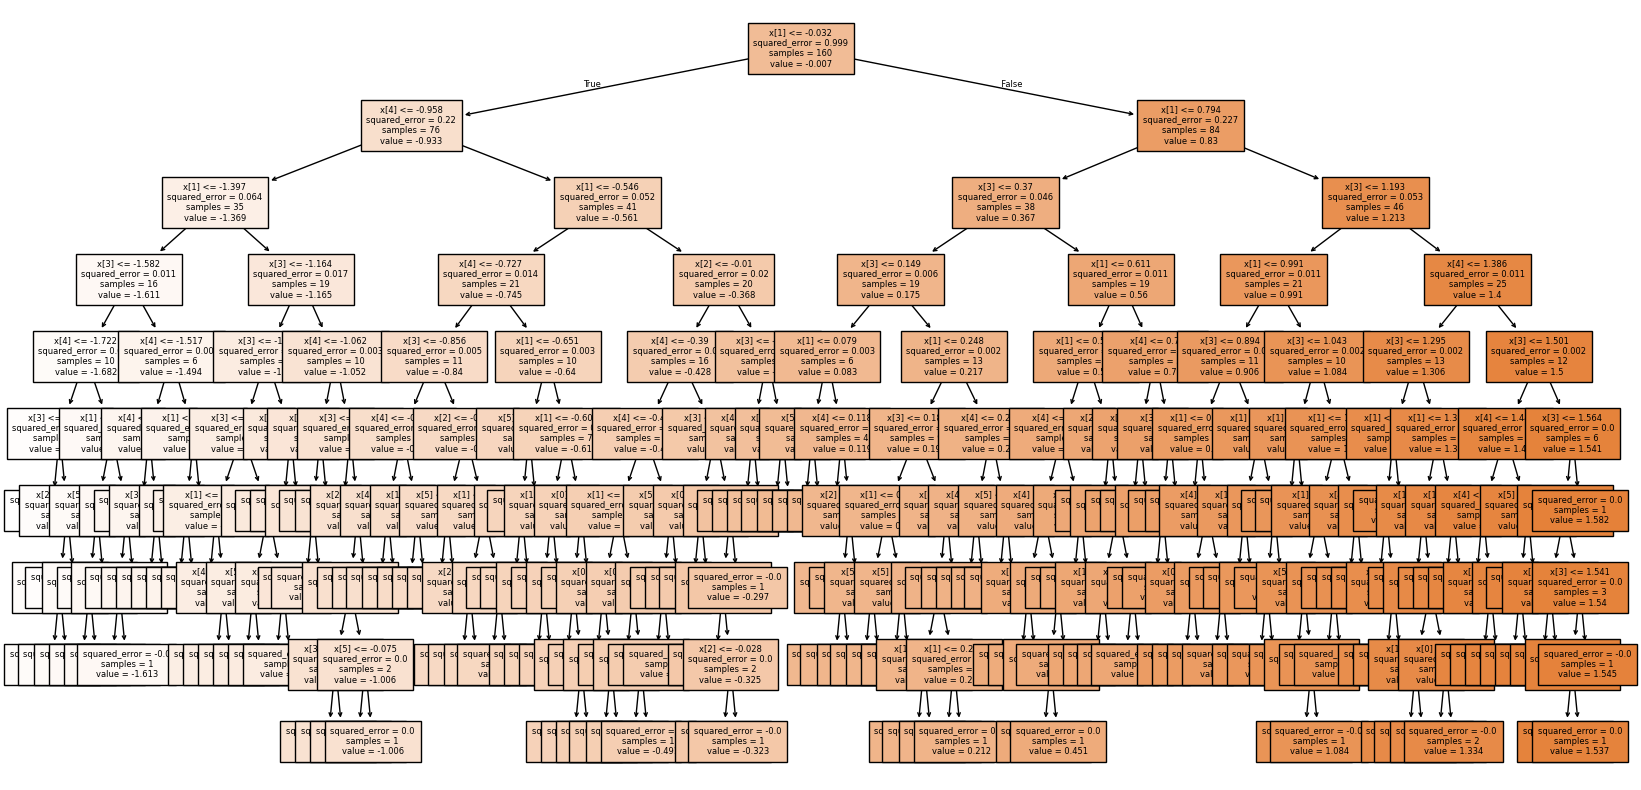

In [43]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, fontsize=6)
plt.show()

In [44]:
pred = dt.predict(X_test)
pred


array([ 0.11676947, -1.01403567,  0.49298177, -0.7857432 , -1.80144574,
        1.24056071,  1.58198806,  0.67840942,  0.55747083,  0.67840942,
       -1.20522347,  1.42881927,  1.15215364, -0.36343191,  1.11055411,
       -0.29718928, -1.39979857, -1.19656611, -0.17402322, -1.48182205,
       -0.7857432 , -0.5514785 , -1.60776558,  0.31248507,  0.25906681,
       -0.17402322, -0.51337425,  1.08070354, -0.29718928, -1.28385196,
        0.78181698, -0.29718928,  1.42881927,  0.85303805,  1.36847528,
        1.36847528, -0.50199252,  0.78181698, -1.39979857,  0.97530736])

In [45]:
y_test

95     0.109916
15    -1.018206
30     0.480013
158   -0.805728
128   -1.791544
115    1.263970
69     1.584798
170    0.694172
174    0.595884
45     0.646781
66    -1.192243
182    1.411624
165    1.161039
78    -0.352340
186    1.107574
177   -0.253432
56    -1.417898
152   -1.179298
82    -0.452931
68    -1.481822
124   -0.841890
16    -0.551479
148   -1.584167
93     0.329092
65     0.269115
60    -0.246170
84    -0.528585
67     1.065735
125   -0.116911
132   -1.283852
9      0.788037
18    -0.095628
55     1.405884
75     0.849956
150    1.365591
104    1.365591
135   -0.483073
137    0.772476
164   -1.413366
76     0.975307
Name: target_price_market, dtype: float64